In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Linear Regression using sklearn

In [2]:
from sklearn import linear_model, metrics

In [3]:
data = pd.read_csv("BigMac-NetHourlyWage.csv")

In [4]:
data.columns

Index(['Country', 'Big Mac Price ($)', 'Net Hourly Wage ($)'], dtype='object')

In [5]:
data.drop('Country', axis=1, inplace=True)

In [6]:
data.columns

Index(['Big Mac Price ($)', 'Net Hourly Wage ($)'], dtype='object')

In [7]:
data.rename(columns={'Big Mac Price ($)':'Big_Mac_Price', 'Net Hourly Wage ($)':'Net_Hourly_Wage'}, inplace=True)

In [8]:
data.columns

Index(['Big_Mac_Price', 'Net_Hourly_Wage'], dtype='object')

In [9]:
data.shape

(27, 2)

In [10]:
data.describe()

,Big_Mac_Price,Net_Hourly_Wage
count,27.000000,27.000000
mean,3.348889,7.725926
std,1.198093,5.927225
min,1.780000,1.300000
25%,2.475000,3.100000
50%,3.330000,5.100000
75%,3.785000,13.150000
max,6.560000,22.600000


<AxesSubplot:xlabel='Big_Mac_Price'>

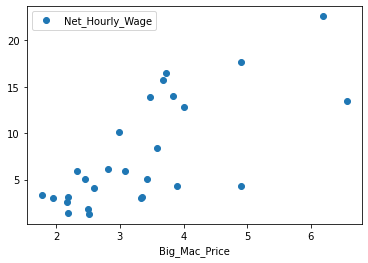

In [11]:
data.plot(x='Big_Mac_Price', y='Net_Hourly_Wage', style='o')

C:\Users\UVV2KOR\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Net_Hourly_Wage', ylabel='Density'>

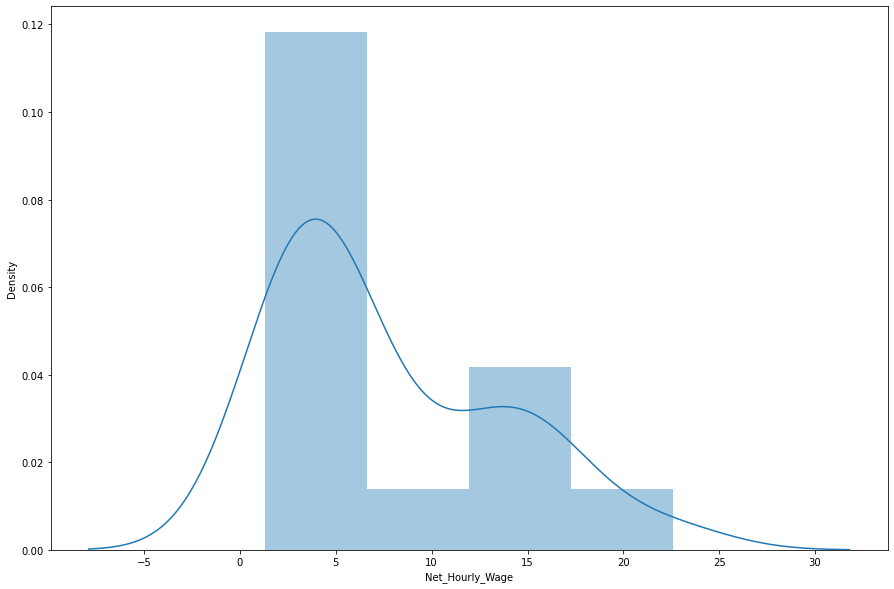

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(data['Net_Hourly_Wage'])

In [13]:
X = data['Big_Mac_Price'].values.reshape(-1,1)
y = data['Net_Hourly_Wage'].values.reshape(-1,1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [15]:
simple_linear_model = linear_model.LinearRegression()

In [16]:
simple_linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Slope of Regression Line: ", simple_linear_model.coef_)
print("Intercept of Regression Line: ", simple_linear_model.intercept_)

Slope of Regression Line:  [[3.70188813]]
Intercept of Regression Line:  [-4.60669824]


In [18]:
y_pred = simple_linear_model.predict(X_test)

In [19]:
target_Variable = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
target_Variable

,Actual,Predicted
0,3.0,7.720589
1,2.6,3.426399
2,13.5,19.677688
3,3.1,3.500437
4,3.1,7.757608
5,15.7,8.979231
6,10.1,6.461947
7,22.6,18.307989
8,3.0,2.611984


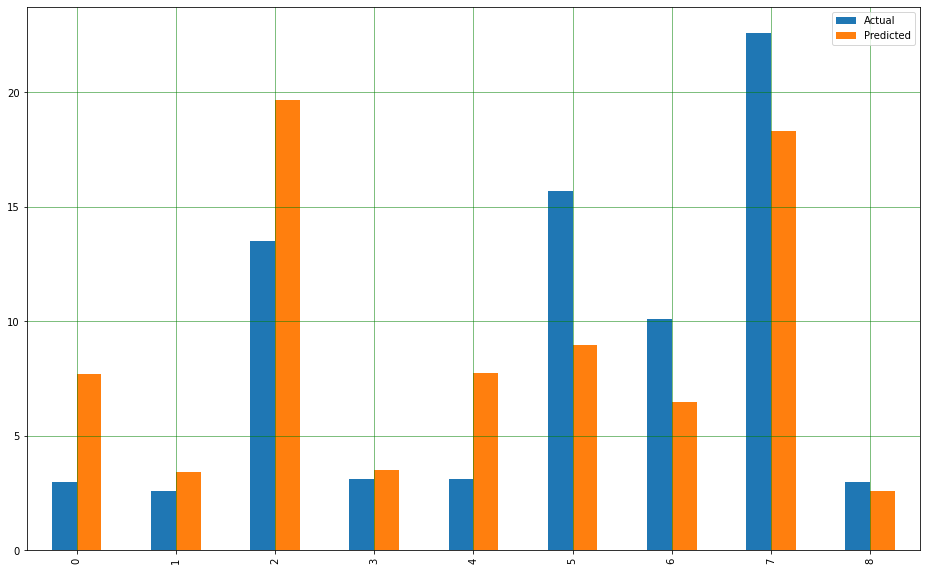

In [20]:
target_Variable.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

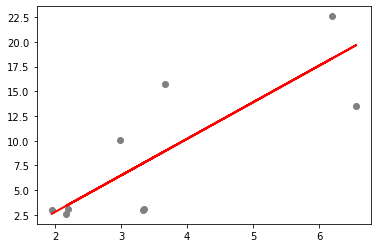

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.53572996108736
Mean Squared Error: 17.77338470877092
Root Mean Squared Error: 4.215849227471367


### Linear Regression using statsmodel

In [31]:
import statsmodels.api as sm

In [34]:
# X_train = sm.add_constant(X_train)
linear_model = sm.OLS(y_train, X_train).fit()

In [37]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     10.57
Date:                Fri, 21 May 2021   Prob (F-statistic):            0.00500
Time:                        09:20:52   Log-Likelihood:                -50.394
No. Observations:                  18   AIC:                             104.8
Df Residuals:                      16   BIC:                             106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6067      3.803     -1.211      0.2

### Skew 
A measure of data symmetry. We want to see something close to zero, indicating that our data distribution is normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

### Kurtosis
A measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

### Omnibus/Prob(Omnibus)
A test of the skewness and kurtosis of the residual. We hope to see a value close to zero which would indicate normality. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. In this case Omnibus is relatively high and the Prob (Omnibus) is also relatively high so the data is somewhat normal, but not altogether ideal.
###### Here, the null hypothesis is that the errors are normally distributed.

### Durbin-Watson 
Tests for homoscedasticity. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2.

### Jarque-Bera (JB)/Prob(JB) 
Like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. 

### Condition Number
This test measures the sensitivity of a function's output as compared to its input. When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 20. This is not valid for a model having single independent variable since multicollinearity with single IV is not possible.